## 6. Gradient Boosting Homework  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [2]:
def mse(y, y_pred):
    return np.sum((y - y_pred)**2) / len(y)

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Task 1

Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от
максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [5]:
def predict(X, trees_list, coef_list, eta):
#     for alg , coef in zip(trees_list, coef_list):
#         pred = eta * coef * alg.predict([X])[0]
#     return np.array(sum(pred) for x in X)
        return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [23]:
def bias(y, z):
    return (y - z)

In [ ]:
class GradientBoostingRegressor:
    def __init__(self, *args, n_trees=100, learning_rate=0.01, **kwargs):
        self.args = args
        self.kwargs = kwargs
        
        self.n_trees = n_trees
        self.learning_rate = learning_rate
        self.trees = None
        
        self.train_errors = None
        self.test_errors = None
        
        
    def fit(self, X_train, y_train, X_test, y_test):
        X_train = pd.DataFrame(X_train)
        y_train = pd.Series(y_train)
        
        self.trees = []

        self.train_errors = []
        self.test_errors = []

        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(*self.args, **self.kwargs)

            if len(self.trees) == 0:
                tree.fit(X_train, y_train)

            else:
                prediction = self.predict(X_train)
                tree.fit(X_train, self.bias(y_train, prediction))
                
            self.trees.append(tree)
            
            self.train_errors.append(mse(y_train, self.predict(X_train)))
            self.test_errors.append(mse(y_test, self.predict(X_test)))
    
    def predict(self, X):
        return np.sum([self.learning_rate * tree_predict(X) for tree in self.trees], axis=0)
   
    @staticmethod
    def bias(y, y_pred):
        return (y - y_pred)

In [ ]:
%pdb
model = GradientBoostingRegressor(n_trees=10, max_depth=5, random_state=0)
model.fit(X_train, y_train, X_test, y_test)
model.train_errors[-1]

In [58]:
train_prediction = predict(X_train, trees, coefs, eta)
print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} с шагом {eta} на тренировочной выборке: {mse(y_train, train_prediction)}')

test_prediction = predict(X_test, trees, coefs, eta)
print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} с шагом {eta} на тестовой выборке: {mse(y_test, test_prediction)}')

Ошибка алгоритма из [1, 3, 5, 10] деревьев глубиной [1, 2, 3, 5] с шагом 0.01 на тренировочной выборке: 12279.146710921008
Ошибка алгоритма из [1, 3, 5, 10] деревьев глубиной [1, 2, 3, 5] с шагом 0.01 на тестовой выборке: 14208.358141833662


In [ ]:
n_trees = None

In [94]:
# colors = ListedColormap(['red', 'blue'])
# light_colors = ListedColormap(['lightcoral', 'lightblue'])
# fig, ax = plt.subplots(figsize = (26, 28))
# fig, axes = plt.subplots(len(tree_counts), 2, figsize = (26, 28))

errors = []

for md in max_depth:
    coefs = [1] * md
    trees, train_errors, test_errors = fit(3, md, X_train, X_test, y_train, y_test, coefs, eta)
    errors.append(test_errors)

In [95]:
errors

[[30795.26126126126, 30270.270564887593, 30270.270564887593],
 [30795.26126126126, 30280.488015500465, 29775.891427122282],
 [30795.26126126126, 30278.043702984727, 29771.16242790236],
 [30795.26126126126, 30308.860583116337, 29819.561021517828]]

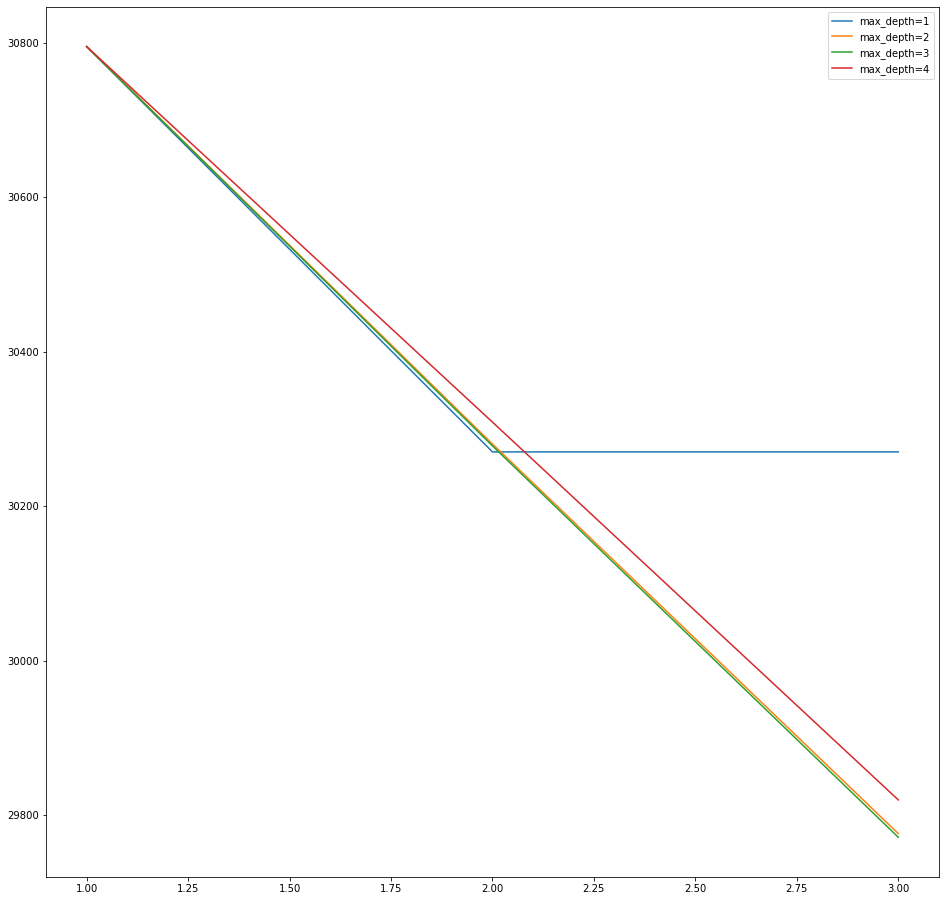

In [101]:
fig, ax = plt.subplots(figsize=(16,16))
for i, depth_errs in enumerate(errors, 1):
    ax.plot(np.arange(1, 4), depth_errs, label=f'max_depth={i}')
plt.legend()
plt.show()